# Color Grid Sampling Example

This notebook demonstrates using the coloropt package for grid-based color sampling.

In [1]:
# import sys
# sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from coloropt.grid import farthest_point_sampling_2d, farthest_point_sampling_rgb, get_hsv_colors
from coloropt.visualization import plot_color_list, plot_2d_point_distribution
from coloropt.core import evaluate_point_distribution

## 2D Point Sampling Example

In [2]:
# Generate a 2D grid of candidate points
domain = (0, 10)  # domain range
resolution = 100  # number of points per axis
x_vals = np.linspace(domain[0], domain[1], resolution)
y_vals = np.linspace(domain[0], domain[1], resolution)
grid_x, grid_y = np.meshgrid(x_vals, y_vals)
points = list(zip(grid_x.flatten(), grid_y.flatten()))

Chosen points (without prior): [(np.float64(0.0), np.float64(0.0)), (np.float64(10.0), np.float64(10.0)), (np.float64(10.0), np.float64(0.0)), (np.float64(0.0), np.float64(10.0)), (np.float64(4.94949494949495), np.float64(4.94949494949495)), (np.float64(9.8989898989899), np.float64(5.05050505050505)), (np.float64(5.05050505050505), np.float64(9.8989898989899)), (np.float64(4.94949494949495), np.float64(0.0)), (np.float64(0.0), np.float64(4.94949494949495)), (np.float64(7.474747474747475), np.float64(2.525252525252525)), (np.float64(2.525252525252525), np.float64(7.474747474747475)), (np.float64(2.525252525252525), np.float64(2.4242424242424243)), (np.float64(7.474747474747475), np.float64(7.474747474747475)), (np.float64(7.474747474747475), np.float64(0.0)), (np.float64(10.0), np.float64(2.525252525252525)), (np.float64(0.0), np.float64(7.474747474747475)), (np.float64(2.525252525252525), np.float64(10.0)), (np.float64(10.0), np.float64(7.474747474747475)), (np.float64(7.57575757575757

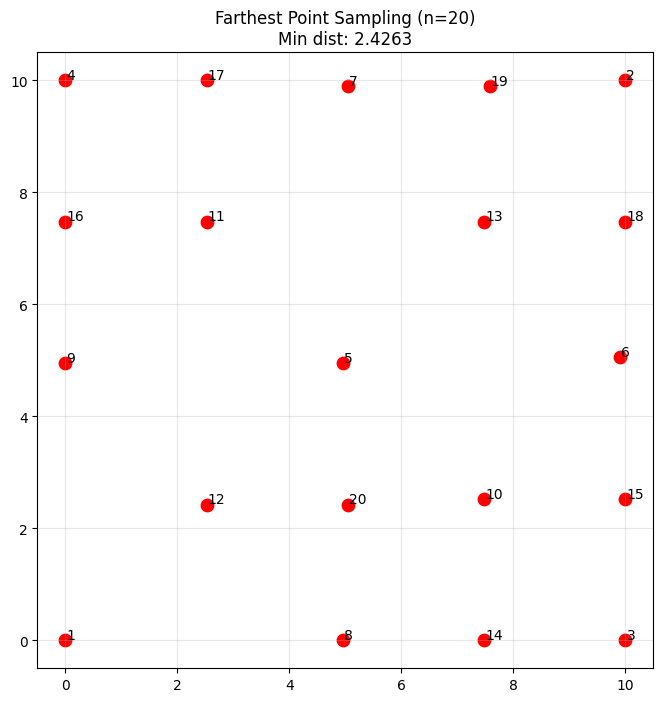

--- Evaluation for Farthest Point Sampling (n=20) ---
Number of points: 20
Minimum distance: 2.4263
Mean distance: 6.9259
Median distance: 7.1070
Max distance: 14.1421



(np.float64(2.4263458887806695),
 array([ 2.42634589,  2.42634589,  2.42634589,  2.42634589,  2.42634589,
         2.52525253,  2.52525253,  2.52525253,  2.52525253,  2.52525253,
         2.52525253,  2.52525253,  2.52525253,  2.52525253,  2.52525253,
         2.52525253,  2.52525253,  2.52525253,  2.52525253,  2.52727192,
         2.52727192,  2.52727192,  3.42839651,  3.42839651,  3.42839651,
         3.42839651,  3.42839651,  3.50055019,  3.50055019,  3.50055019,
         3.50055019,  3.50055019,  3.50055019,  3.57124637,  3.57124637,
         3.57124637,  3.57124637,  3.57124637,  3.57124637,  3.57124637,
         3.57124637,  3.57124637,  4.94949495,  4.94949495,  4.94949495,
         4.94949495,  4.94949495,  4.94949495,  4.94949495,  4.95052556,
         4.95052556,  4.95052556,  4.95052556,  4.95052556,  4.95052556,
         5.05050505,  5.05050505,  5.05050505,  5.05151505,  5.05151505,
         5.05151505,  5.37635692,  5.51130217,  5.51130217,  5.51130217,
         5.5140784

In [3]:
# Sample n points without prior
n = 20
chosen = farthest_point_sampling_2d(points, n)
print(f"Chosen points (without prior): {chosen}")
chosen_array = np.array(chosen)

# Plot results
plot_2d_point_distribution(chosen_array, title=f"Farthest Point Sampling (n={n})")

# Evaluate the distribution
evaluate_point_distribution(chosen_array, title=f"Farthest Point Sampling (n={n})")

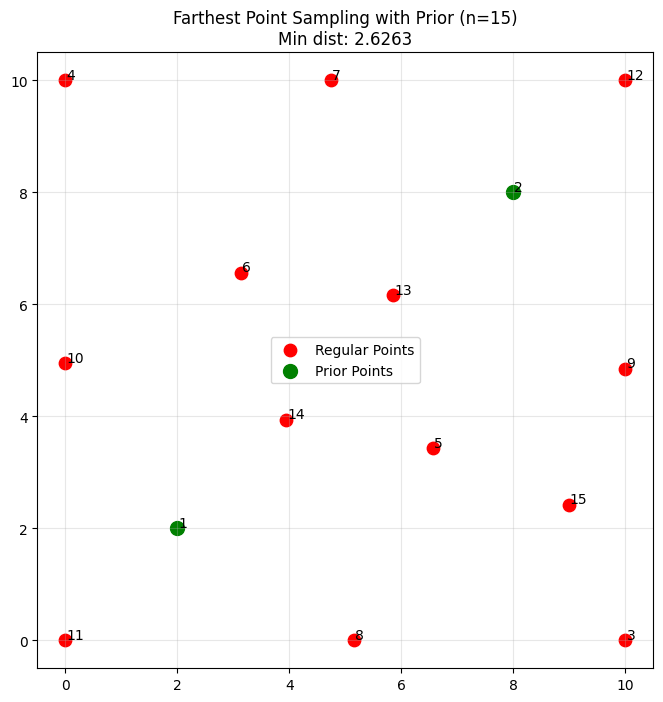

--- Evaluation for Farthest Point Sampling with Prior (n=15) ---
Number of points: 15
Minimum distance: 2.6263
Mean distance: 6.7346
Median distance: 6.8128
Max distance: 14.1421



(np.float64(2.626262626262626),
 array([ 2.62626263,  2.62626263,  2.62626263,  2.6743843 ,  2.74271721,
         2.74777182,  2.7570392 ,  2.81743953,  2.82228802,  2.82842712,
         2.82842712,  2.93625088,  3.52379061,  3.56363865,  3.71409622,
         3.71409622,  3.73256584,  3.73256584,  3.795615  ,  3.81823526,
         3.99596777,  4.06683276,  4.12165773,  4.34460872,  4.5398394 ,
         4.64756245,  4.64756245,  4.70373142,  4.74747475,  4.78566202,
         4.78566202,  4.84848485,  4.84848485,  4.85689506,  4.875765  ,
         4.94949495,  5.05050505,  5.07557415,  5.15151515,  5.15151515,
         5.25252525,  5.27288208,  5.57114434,  5.64663631,  5.66294734,
         5.6751858 ,  5.74256416,  5.9826638 ,  6.11424079,  6.12840861,
         6.2020531 ,  6.73821417,  6.81275504,  6.85679303,  6.86942955,
         6.93153069,  7.00276156,  7.00401447,  7.08008037,  7.14392109,
         7.17456196,  7.22840027,  7.22840027,  7.27413006,  7.35711424,
         7.40962624

In [4]:
# Sample with prior points
prior_points = [(2, 2), (8, 8)]
n_with_prior = 15
chosen_with_prior = farthest_point_sampling_2d(points, n_with_prior, prior_points)
chosen_with_prior_array = np.array(chosen_with_prior)

# Plot results - mark prior points in green
prior_indices = [0, 1]  # Prior points are the first two in the array
plot_2d_point_distribution(chosen_with_prior_array, 
                         title=f"Farthest Point Sampling with Prior (n={n_with_prior})",
                         prior_indices=prior_indices)

# Evaluate the distribution
evaluate_point_distribution(chosen_with_prior_array, 
                          title=f"Farthest Point Sampling with Prior (n={n_with_prior})")

## RGB Color Sampling Example

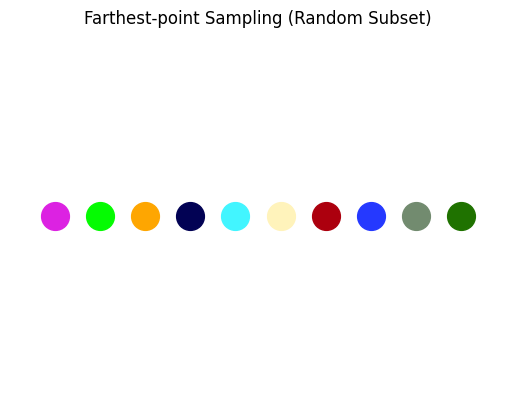

In [5]:
# Sample n RGB colors
n_colors = 10
fps_colors = farthest_point_sampling_rgb(n=n_colors)
plot_color_list(fps_colors, "Farthest-point Sampling (Random Subset)")
plt.show()

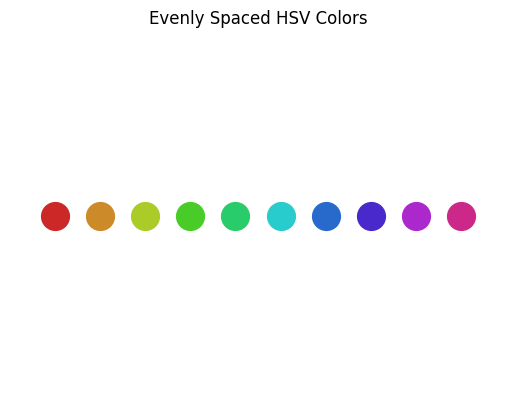

In [6]:
# Evenly spaced HSV colors
hsv_colors = get_hsv_colors(n=n_colors, saturation=0.8, value=0.8)
plot_color_list(hsv_colors, "Evenly Spaced HSV Colors")
plt.show()

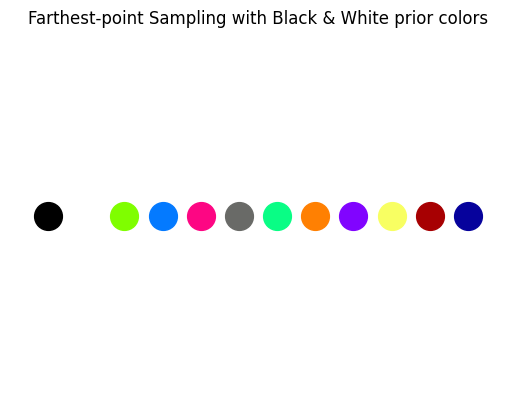

In [7]:
# Sample with prior colors (black and white)
prior_colors = [(0, 0, 0), (255, 255, 255)]
n_with_prior = 12
fps_with_prior = farthest_point_sampling_rgb(n=n_with_prior, prior_colors=prior_colors)
plot_color_list(fps_with_prior, "Farthest-point Sampling with Black & White prior colors")
plt.show()

## Comparing Distribution Quality

Let's compare the quality of distributions produced by different methods:

--- Evaluation for Farthest-point RGB Colors ---
Number of points: 10
Minimum distance: 139.4597
Mean distance: 245.3434
Median distance: 260.3190
Max distance: 378.8007

--- Evaluation for Evenly Spaced HSV Colors ---
Number of points: 10
Minimum distance: 73.7902
Mean distance: 178.2143
Median distance: 193.8788
Max distance: 284.0563



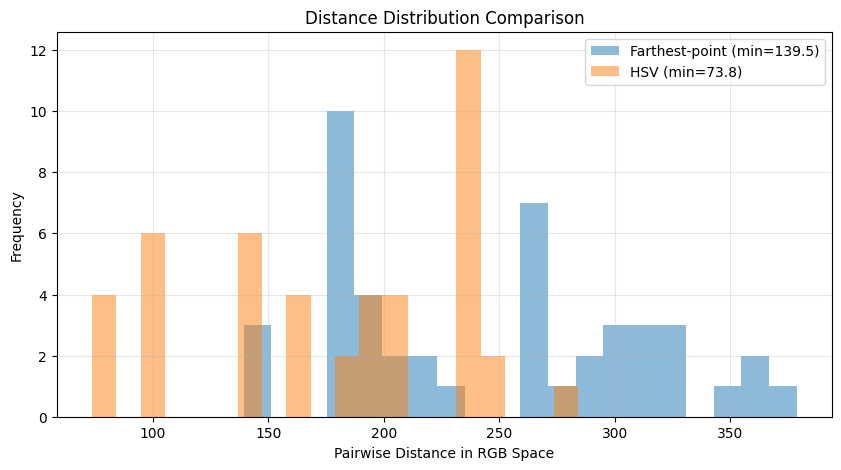

In [8]:
import numpy as np

# Convert RGB tuples to numpy arrays for distance calculations
fps_array = np.array(fps_colors)
hsv_array = np.array(hsv_colors)

# Evaluate both distributions
fps_min_dist, fps_all_dists = evaluate_point_distribution(fps_array, "Farthest-point RGB Colors")
hsv_min_dist, hsv_all_dists = evaluate_point_distribution(hsv_array, "Evenly Spaced HSV Colors")

# Plot histograms of the distance distributions
plt.figure(figsize=(10, 5))
plt.hist(fps_all_dists, bins=20, alpha=0.5, label=f'Farthest-point (min={fps_min_dist:.1f})')
plt.hist(hsv_all_dists, bins=20, alpha=0.5, label=f'HSV (min={hsv_min_dist:.1f})')
plt.xlabel('Pairwise Distance in RGB Space')
plt.ylabel('Frequency')
plt.title('Distance Distribution Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Creating a Large Palette

Now let's create a larger palette of well-spaced colors:

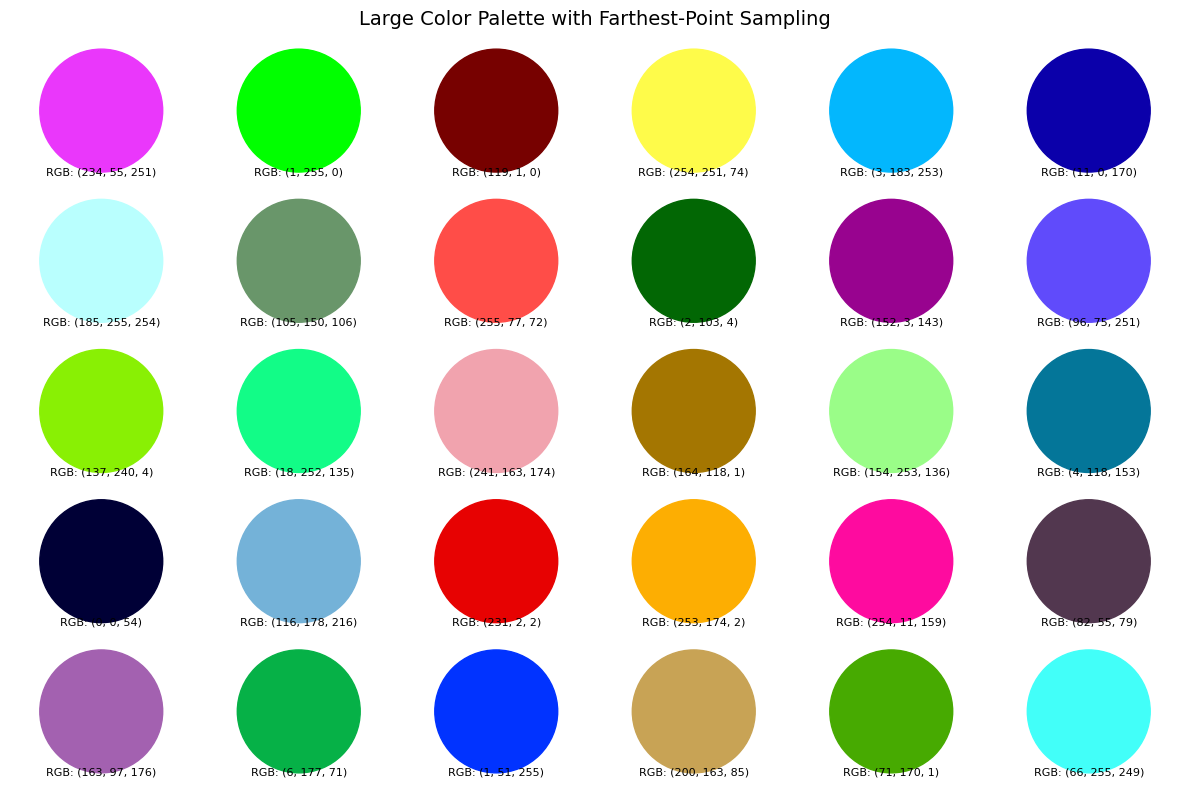

In [9]:
# Create a large palette of 30 colors
large_palette = farthest_point_sampling_rgb(n=30, sample_size=100000)

# Plot them in a grid format (5 rows, 6 columns)
plt.figure(figsize=(12, 8))
rows, cols = 5, 6
for i, color in enumerate(large_palette):
    r, g, b = color[0]/255, color[1]/255, color[2]/255
    row, col = i // cols, i % cols
    plt.subplot(rows, cols, i+1)
    plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.4, color=(r, g, b)))
    plt.axis('equal')
    plt.axis('off')
    plt.text(0.5, 0.08, f"RGB: {color}", ha='center', fontsize=8)
plt.suptitle("Large Color Palette with Farthest-Point Sampling", fontsize=14)
plt.tight_layout()
plt.show()